<a href="https://colab.research.google.com/github/Genetic-Glitch/BioPython/blob/main/Pairwise_Alignment_RBP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install BioPython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.5 MB/s eta 0:00:00


About RBP4 -

Retinol Binding Protein 4 (RBP4) is a key member of the lipocalin family, primarily responsible for transporting retinol (vitamin A) from the liver to peripheral tissues. It plays a central role in retinoid homeostasis, which is essential for:

- Vision (via 11-cis retinaldehyde in the retina)
- Embryonic development

- Immune function

- Cell proliferation and differentiation

- Cardiovascular health

- Expression and Regulation

Highest expression in the liver, followed by adipose tissue, kidney, retinal pigment epithelium, and testes.
In mice, fasting and glucagon stimulate RBP4 expression via cAMP signaling.
Retinoic acid derivatives (e.g., all-trans RA) can modulate RBP4 expression in liver and adipose tissue.
Translation of RBP4 mRNA is regulated by mTORC1, especially during refeeding after fasting1.

In [41]:
from Bio import SeqIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
for sequece_record1 in SeqIO.parse("RBP4_Human.fasta", "fasta"):
  print(sequece_record1.id)
  print(repr(sequece_record1.seq))
  print(len(sequece_record1))
  print(sequece_record1.description)

tr|Q5VY30|Q5VY30_HUMAN
Seq('MNYSKIPAQVDLRRQTERDCRVSSFRVKENFDKARFSGTWYAMAKKDPEGLFLQ...NLL')
199
tr|Q5VY30|Q5VY30_HUMAN Retinol-binding protein OS=Homo sapiens OX=9606 GN=RBP4 PE=1 SV=2


In [4]:
for seq_record_rat in SeqIO.parse("RBP4_Rat.fasta", "fasta"):
  print(seq_record_rat.id)
  print(repr(seq_record_rat.seq))
  print(len(seq_record_rat))
  print(seq_record_rat.description)

sp|P04916|RET4_RAT
Seq('MEWVWALVLLAALGGGSAERDCRVSSFRVKENFDKARFSGLWYAIAKKDPEGLF...NSL')
201
sp|P04916|RET4_RAT Retinol-binding protein 4 OS=Rattus norvegicus OX=10116 GN=Rbp4 PE=1 SV=1


In [5]:
#To find no. of amino acids
from collections import Counter

def get_amino_acid_num(fasta_file):
  amino_acid_count = Counter()
  for amino_acid in SeqIO.parse(fasta_file, "fasta"):
    amino_acid_count.update(amino_acid.seq)
  return dict(amino_acid_count)

In [6]:
RBP4_Human = get_amino_acid_num("RBP4_Human.fasta")
RBP4_Rat = get_amino_acid_num("RBP4_Rat.fasta")

In [7]:
print(RBP4_Human)

{'M': 5, 'N': 10, 'Y': 9, 'S': 12, 'K': 11, 'I': 5, 'P': 6, 'A': 14, 'Q': 10, 'V': 14, 'D': 19, 'L': 15, 'R': 16, 'T': 10, 'E': 10, 'C': 6, 'F': 10, 'G': 11, 'W': 4, 'H': 2}


In [8]:
print(RBP4_Rat)

{'M': 4, 'E': 13, 'W': 7, 'V': 11, 'A': 15, 'L': 18, 'G': 13, 'S': 15, 'R': 17, 'D': 16, 'C': 6, 'F': 11, 'K': 9, 'N': 8, 'Y': 7, 'I': 6, 'P': 5, 'Q': 8, 'H': 3, 'T': 9}


In [10]:
#RBP4_Human.get('Z',2) this will find Z if not found will return 2, but in our script we will use 0

In [11]:
# Prepering data for seaborn
amino_acid_composition = sorted(set(RBP4_Human.keys()).union(set(RBP4_Rat.keys())))
amino_acid_composition

['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [12]:
#Creating df for AA
aa_profile_data = []
for aa in amino_acid_composition:
  aa_profile_data.append({'Amino_Acid': aa, 'Count': RBP4_Human.get(aa, 0), 'Species':'Human'})
  aa_profile_data.append({'Amino_Acid': aa, 'Count': RBP4_Rat.get(aa, 0), 'Species':'Rat'})
aa_profile_df = pd.DataFrame(aa_profile_data)

In [13]:
aa_profile_df

,Amino_Acid,Count,Species
0,A,14,Human
1,A,15,Rat
2,C,6,Human
3,C,6,Rat
4,D,19,Human
5,D,16,Rat
6,E,10,Human
7,E,13,Rat
8,F,10,Human
9,F,11,Rat


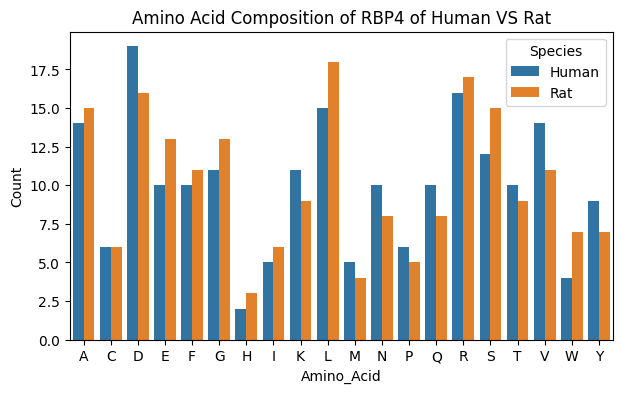

In [14]:
#Plot using seaborn and matplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,4))
ax = sns.barplot(x='Amino_Acid', y='Count', hue='Species' ,data=aa_profile_df)
plt.title('Amino Acid Composition of RBP4 of Human VS Rat')
ticks = ax.get_xticks()
plt.xticks(ticks=ticks, rotation=0, labels=amino_acid_composition)

plt.show()

In [15]:
amino_acid_composition

['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [16]:
#Check whether nonstandard AA present
count = 0
non_std_aa = ['X', 'B', 'Z', 'J', 'U', 'O']
for i in amino_acid_composition:
  if i in non_std_aa:
    count+=1
print(count, " Non-standard found")


0  Non-standard found


In [17]:
#Pairwise Alignment

In [18]:
from Bio import Align
from Bio.Align import substitution_matrices
aligner = Align.PairwiseAligner()

In [19]:
print(aligner.match_score)
print(aligner.mismatch_score)
print(aligner.open_gap_score)
print(aligner.extend_gap_score)

1.0
0.0
0.0
0.0


🔧 Key Parameters in PairwiseAligner

1. match_score
What it does: Score for identical amino acids.
Standard value: 1.0 (default)
Why: A positive score rewards matches. You can increase it (e.g., 2.0) if you want to emphasize exact matches more strongly.

2. mismatch_score
What it does: Penalty for mismatched amino acids.
Standard value: -1.0 (default)

Why: Penalizes substitutions. You can adjust this based on how tolerant you want the alignment to be to changes.

3. open_gap_score
What it does: Penalty for opening a gap (insertion/deletion).
Standard value: -10.0 (commonly used)
Why: Reflects the biological cost of introducing a gap. A higher penalty discourages gaps.

4. extend_gap_score
What it does: Penalty for extending an existing gap.
Standard value: -0.5 to -1.0
Why: Encourages fewer, longer gaps rather than many short ones — more biologically realistic.


In [20]:
aligner.match_score = 1
aligner.mismatch_score = -1
aligner.open_gap_score = -10
aligner.extend_gap_score = -0.5

In [21]:
target_seq_human = SeqIO.read("RBP4_Human.fasta", "fasta")
query_seq_rat = SeqIO.read("RBP4_Rat.fasta", "fasta")

In [22]:
target_seq_human.seq

Seq('MNYSKIPAQVDLRRQTERDCRVSSFRVKENFDKARFSGTWYAMAKKDPEGLFLQ...NLL')

In [23]:
query_seq_rat.seq

Seq('MEWVWALVLLAALGGGSAERDCRVSSFRVKENFDKARFSGLWYAIAKKDPEGLF...NSL')

In [24]:
score = aligner.score(target_seq_human.seq, query_seq_rat.seq)
print(len(query_seq_rat.seq), len(query_seq_rat.seq))
print(score)

201 201
108.5


In [25]:
alignments = aligner.align(target_seq_human.seq, query_seq_rat.seq)
for i, alignment in enumerate(alignments):
  print('Alignment No. ', i+1)
  print(alignment)
  print('\n')

Alignment No.  1
target            0 M--NYSKIPAQVDLRRQTERDCRVSSFRVKENFDKARFSGTWYAMAKKDPEGLFLQDNIV
                  0 |--...............||||||||||||||||||||||.|||.||||||||||||||.
query             0 MEWVWALVLLAALGGGSAERDCRVSSFRVKENFDKARFSGLWYAIAKKDPEGLFLQDNII

target           58 AEFSVDETGQMSATAKGRVRLLNNWDVCADMVGTFTDTEDPAKFKMKYWGVASFLQKGND
                 60 |||||||.|.||||||||||||.||.||||||||||||||||||||||||||||||.|||
query            60 AEFSVDEKGHMSATAKGRVRLLSNWEVCADMVGTFTDTEDPAKFKMKYWGVASFLQRGND

target          118 DHWIVDTDYDTYAVQYSCRLLNLDGTCADSYSFVFSRDPNGLPPEAQKIVRQRQEELCLA
                120 ||||.||||||.|.||||||.|||||||||||||||||||||.||....||||||||||.
query           120 DHWIIDTDYDTFALQYSCRLQNLDGTCADSYSFVFSRDPNGLTPETRRLVRQRQEELCLE

target          178 RQYRLIVHNGYCDGRSERNLL 199
                180 ||||.|.|||||..|..||.| 201
query           180 RQYRWIEHNGYCQSRPSRNSL 201



Alignment No.  2
target            0 MN--YSKIPAQVDLRRQTERDCRVSSFRVKENFDKARFSGTWYAMAKKDPEGLFLQDNIV
            

In [26]:
alignment = alignments[0]
print(alignment)
print(alignment.coordinates)

target            0 M--NYSKIPAQVDLRRQTERDCRVSSFRVKENFDKARFSGTWYAMAKKDPEGLFLQDNIV
                  0 |--...............||||||||||||||||||||||.|||.||||||||||||||.
query             0 MEWVWALVLLAALGGGSAERDCRVSSFRVKENFDKARFSGLWYAIAKKDPEGLFLQDNII

target           58 AEFSVDETGQMSATAKGRVRLLNNWDVCADMVGTFTDTEDPAKFKMKYWGVASFLQKGND
                 60 |||||||.|.||||||||||||.||.||||||||||||||||||||||||||||||.|||
query            60 AEFSVDEKGHMSATAKGRVRLLSNWEVCADMVGTFTDTEDPAKFKMKYWGVASFLQRGND

target          118 DHWIVDTDYDTYAVQYSCRLLNLDGTCADSYSFVFSRDPNGLPPEAQKIVRQRQEELCLA
                120 ||||.||||||.|.||||||.|||||||||||||||||||||.||....||||||||||.
query           120 DHWIIDTDYDTFALQYSCRLQNLDGTCADSYSFVFSRDPNGLTPETRRLVRQRQEELCLE

target          178 RQYRLIVHNGYCDGRSERNLL 199
                180 ||||.|.|||||..|..||.| 201
query           180 RQYRWIEHNGYCQSRPSRNSL 201

[[  0   1   1 199]
 [  0   1   3 201]]


In earlier analysis we used simple mismatch score matrix and we got score of 108.5

When we use a matrix like BLOSUM62 or PAM250 to score substitutions based on evolutionary likelihood we will get different score and alignment

Why: More accurate than simple match/mismatch scores for proteins.

In [28]:
from Bio import Align
from Bio.Align import substitution_matrices

aligner = Align.PairwiseAligner()
aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")

score = aligner.score(target_seq_human.seq, query_seq_rat.seq)
print(len(query_seq_rat.seq), len(target_seq_human.seq))
print(score)


201 199
914.0


In [29]:
alignments = aligner.align(target_seq_human.seq, query_seq_rat.seq)
for i, alignment in enumerate(alignments):
  print('Alignment No. ', i+1)
  print(alignment)
  print('\n')

Streaming output truncated to the last 5000 lines.



Alignment No.  715116
target            0 MNYSKI-PA-QV---D-LR--RQ-T-ERDCRVSSFRVKENFDKARFSG-TWYAMAKKDPE
                  0 |..--.--|--|-----|------.-||||||||||||||||||||||--|||.||||||
query             0 MEW--VW-AL-VLLA-AL-GG--GSAERDCRVSSFRVKENFDKARFSGL-WYAIAKKDPE

target           49 GLFLQDNIVAEFSVDET-GQMSATAKGRVRLLNNWDVCADMVGTFTDTEDPAKFKMKYWG
                 60 ||||||||.|||||||--|.||||||||||||.||.||||||||||||||||||||||||
query            51 GLFLQDNIIAEFSVDE-KGHMSATAKGRVRLLSNWEVCADMVGTFTDTEDPAKFKMKYWG

target          108 VASFLQKGNDDHWIVDTDYDTYAVQYSCRLL-NLDGTCADSYSFVFSRDPNGLP-PE-AQ
                120 ||||||.|||||||.||||||.|.||||||--|||||||||||||||||||||--||--.
query           110 VASFLQRGNDDHWIIDTDYDTFALQYSCRL-QNLDGTCADSYSFVFSRDPNGL-TPET-R

target          165 KIVRQRQEELCLA-RQYRL-IV-HNGYCDG--R-SERN-LL 199
                180 ..||||||||||--||||--|--|||||----|-|-||-|- 221
query           167 RLVRQRQEELCL-ERQYR-WI-EHNGYC--QSRPS-RNSL

KeyboardInterrupt: 

The above code was interrupted because BioPython's aligner.align() returns all alignments that meet the scoring criteria.

With BLOSUM, many alignments may have similar scores, especially if the sequences are long (201 bp) and share conserved regions.

That's why we saw a huge explosion in alignment count

In [31]:
#Lets analyse the first 10 alignments:

alignments = aligner.align(target_seq_human.seq, query_seq_rat.seq)
for i, alignment in enumerate(alignments):
  if i >= 10:
    break
  print('Alignment No. ', i+1)
  print(alignment)
  print('\n')

Alignment No.  1
target            0 MN-YSKIP-AQ-VDLRRQ-------T-ERDCRVSSFRVKENFDKARFSGT-WYAMAKKDP
                  0 |--.--.--|--|-|----------.-||||||||||||||||||||||--|||.|||||
query             0 M-EW--V-WA-LV-L---LAALGGGSAERDCRVSSFRVKENFDKARFSG-LWYAIAKKDP

target           48 EGLFLQDNIVAEFSVDET-GQ-MSATAKGRVRLLNNWDVCADMVGTFTDTEDPAKFKMKY
                 60 |||||||||.|||||||--|--||||||||||||.||.||||||||||||||||||||||
query            50 EGLFLQDNIIAEFSVDE-KG-HMSATAKGRVRLLSNWEVCADMVGTFTDTEDPAKFKMKY

target          106 WGVASFLQKGNDDHWIVDTDYDTYAVQYSCRLL-NLDGTCADSYSFVFSRDPNGL-PPEA
                120 ||||||||.|||||||.||||||.|.||||||--|||||||||||||||||||||-|-|-
query           108 WGVASFLQRGNDDHWIIDTDYDTFALQYSCRL-QNLDGTCADSYSFVFSRDPNGLTP-E-

target          164 -QKIVRQRQEELCLA-RQYRL-IV-HNGYCDG--R-SERN-LL 199
                180 -...||||||||||--||||--|--|||||----|-|-||-|- 223
query           165 TRRLVRQRQEELCL-ERQYR-WI-EHNGYC--QSRPS-RNSL- 201



Alignment No.  2
target            0 M-NYSKI

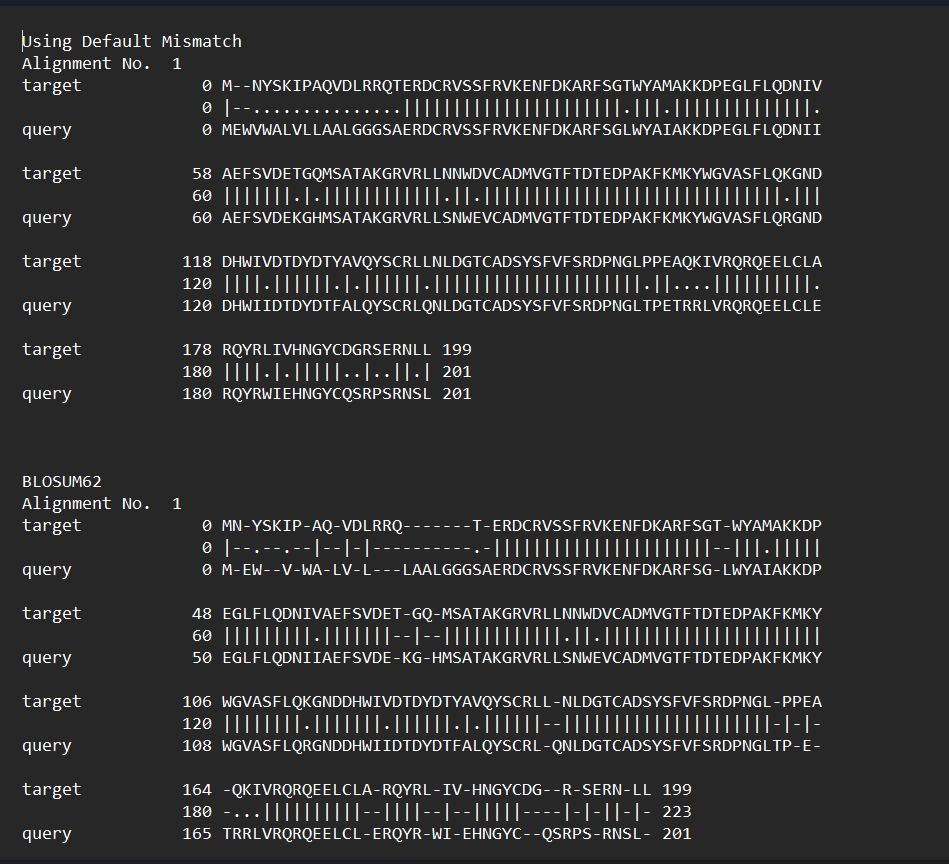

By comparing one of the alignent we can interpret form above -

*   Default mismatch has added only two gaps on target sequence and none in the query
*   In BLOSUM62 ariund 24 gaps were added in target and 22 in query

Why You See More Gaps (“-”) with BLOSUM
When you use BLOSUM62, the alignment algorithm becomes more biologically flexible:

It allows gaps insertions/deletions if they increase the overall score.

The algorithm is trying to maximize biological similarity, not just exact character matches.

So instead of forcing mismatches, it may insert gaps to align conserved regions better — especially in protein sequences, where structure and function matter more than strict identity.


In [ ]:
#Similarly PAM250 is also tried here, we almost got similar score but hetmaps will be different here

In [33]:
from Bio import Align
from Bio.Align import substitution_matrices

aligner = Align.PairwiseAligner()
aligner.substitution_matrix = substitution_matrices.load("PAM250")

score = aligner.score(target_seq_human.seq, query_seq_rat.seq)
print(len(query_seq_rat.seq), len(target_seq_human.seq))
print(score)


201 199
913.0


In [34]:
alignments = aligner.align(target_seq_human.seq, query_seq_rat.seq)
for i, alignment in enumerate(alignments):
  print('Alignment No. ', i+1)
  print(alignment)
  print('\n')
  #This is purposely terminated as we are getting too many alignments

Streaming output truncated to the last 5000 lines.


Alignment No.  216849
target            0 MN-YSKI-PAQ-VD-LRRQ------T-ERDCRVSSFRVKENFDKARFSG-TWYAMAKKDP
                  0 |.----.--|--|--|---------.-||||||||||||||||||||||--|||.|||||
query             0 MEW---VW-A-LV-LL---AALGGGSAERDCRVSSFRVKENFDKARFSGL-WYAIAKKDP

target           48 EGLFLQDNIVAEFSVDE-TGQMSATAKGRVRLLNNWDVCADMVGTFTDTEDPAKFKMKYW
                 60 |||||||||.|||||||--|.||||||||||||.||.|||||||||||||||||||||||
query            50 EGLFLQDNIIAEFSVDEK-GHMSATAKGRVRLLSNWEVCADMVGTFTDTEDPAKFKMKYW

target          107 GVASFLQKGNDDHWIVDTDYDTYAVQYSCRLL-NLDGTCADSYSFVFSRDPNGL-PPEAQ
                120 |||||||.|||||||.||||||.|.|||||-|-|||||||||||||||||||||-|-|..
query           109 GVASFLQRGNDDHWIIDTDYDTFALQYSCR-LQNLDGTCADSYSFVFSRDPNGLTP-ETR

target          165 KIVRQRQEELCLA-RQYRL-IV-HNGYCDGR-SERN-LL 199
                180 ..||||||||||--||||--|--|||||..|-|-||-|- 219
query           167 RLVRQRQEELCL-ERQYR-WI-EHNGYCQSRPS-RNSL- 201



KeyboardInterrupt: 

Lets Plot the heatmaps

In [35]:
aa_profile_df['Amino_Acid']

,Amino_Acid
0,A
1,A
2,C
3,C
4,D
5,D
6,E
7,E
8,F
9,F


In [39]:
amino_acids = aa_profile_df['Amino_Acid'].tolist()
amino_acids = sorted(np.unique(amino_acids).tolist())
amino_acids

['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

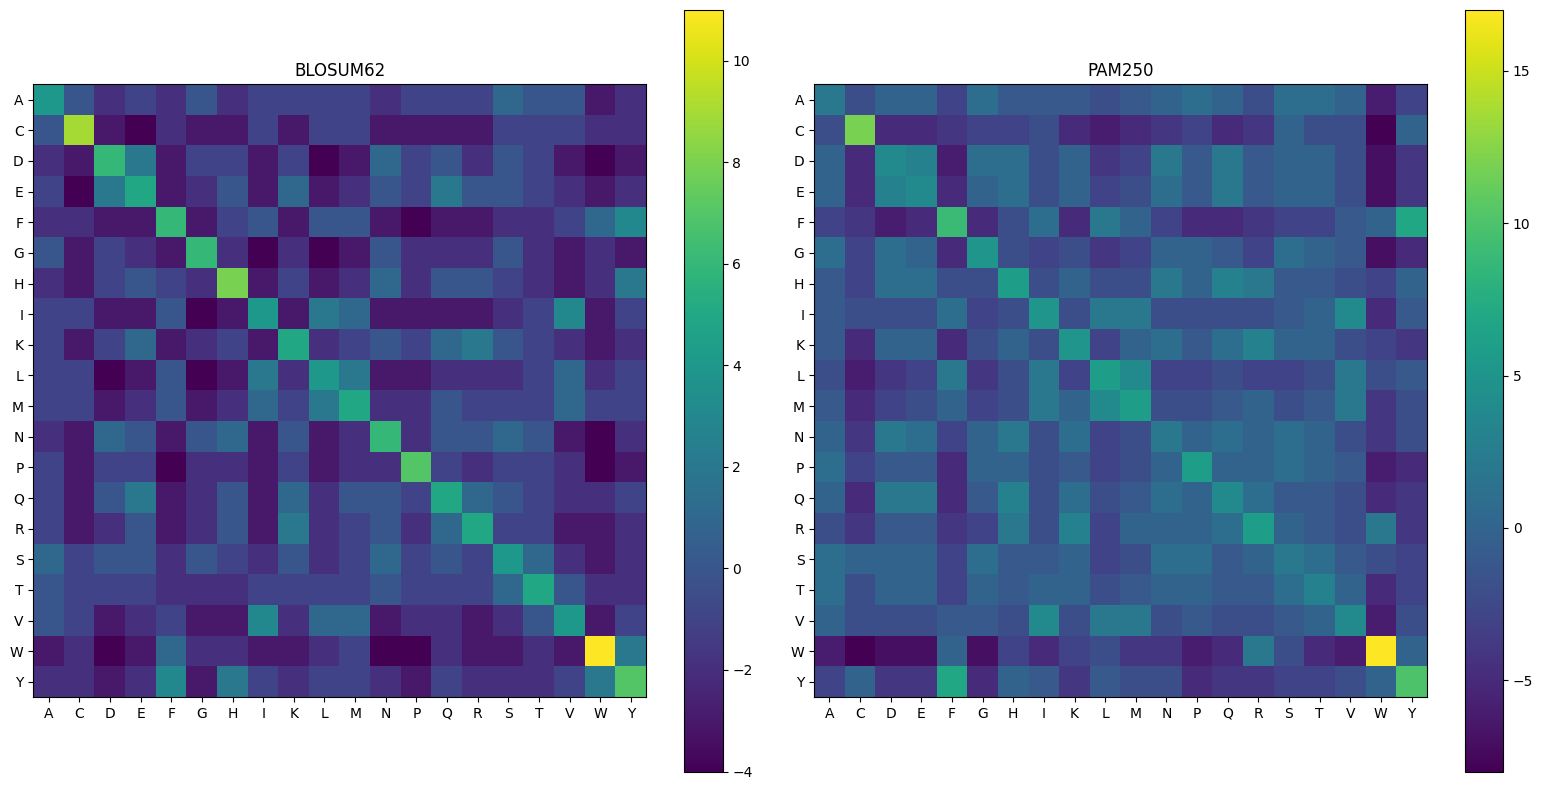

In [40]:
# Load substitution matrices
blosum62 = substitution_matrices.load("BLOSUM62")
pam250 = substitution_matrices.load("PAM250")

# Create score matrices
blosum_matrix = np.zeros((len(amino_acids), len(amino_acids)))
pam_matrix = np.zeros((len(amino_acids), len(amino_acids)))

# Fill matrices with scores
for i, aa1 in enumerate(amino_acids):
    for j, aa2 in enumerate(amino_acids):
        blosum_matrix[i, j] = blosum62.get((aa1, aa2), blosum62.get((aa2, aa1), 0))
        pam_matrix[i, j] = pam250.get((aa1, aa2), pam250.get((aa2, aa1), 0))

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

im1 = axes[0].imshow(blosum_matrix, cmap='viridis')
axes[0].set_title("BLOSUM62")
axes[0].set_xticks(range(len(amino_acids)))
axes[0].set_yticks(range(len(amino_acids)))
axes[0].set_xticklabels(amino_acids)
axes[0].set_yticklabels(amino_acids)
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(pam_matrix, cmap='viridis')
axes[1].set_title("PAM250")
axes[1].set_xticks(range(len(amino_acids)))
axes[1].set_yticks(range(len(amino_acids)))
axes[1].set_xticklabels(amino_acids)
axes[1].set_yticklabels(amino_acids)
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()


Here’s a clear and concise interpretation of your two heatmaps — BLOSUM62 and PAM250

🧬 Heatmap Comparison: BLOSUM62 vs. PAM250

🔹 Score Ranges
BLOSUM62: Scores range from -4 to +11
PAM250: Scores range from -6 to +15
This means PAM250 allows for more extreme scoring, both positive and negative, reflecting its use for more divergent sequences.

🔹 W↔W (Tryptophan ↔ Tryptophan)
Appears bright yellow in both heatmaps.
Indicates a very high substitution score — one of the most conserved amino acid matches.
Suggests that Tryptophan is functionally critical and rarely substituted.

🔹 Diagonal Pattern
BLOSUM62:
The diagonal is bright and well-contrasted.
Shows that identical amino acid matches are strongly favored.
Off-diagonal cells are generally darker, indicating less favorable substitutions.

PAM250:
The diagonal is less contrasted from surrounding cells.
Suggests that non-identical substitutions are more tolerated.
Reflects its design for longer evolutionary distances, where more substitutions are expected.


🧠 Interpretation Summary
BLOSUM62 is better for comparing closely related sequences like human and rat RBP4. It emphasizes conservation.
PAM250 is suited for distantly related sequences, allowing more flexibility in substitutions.
The heatmap contrast visually reinforces how each matrix treats conservation and variability.